<a href="https://colab.research.google.com/github/PradeC123/Numerical-Solution-to-PDE-GD-Smith-/blob/main/Chapter2_PDE_FDM%2C_Convergence%2C_Stability_GD_Smith_(Pranav_Chopde).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Chapter 2: PDE FDM, Convergence, Stability

## Actual Solution

Given $\alpha = 1$ for simplicity, the exact solution of the heat equation can vary depending on the initial and boundary conditions applied. A common scenario for an analytical solution involves a rod (or a one-dimensional domain) with homogeneous boundary conditions (e.g., the temperature at both ends of the rod is kept constant over time) and an initial temperature distribution.

Assuming:
- The rod extends from $x=0$ to $x=L$,
- Homogeneous Dirichlet boundary conditions, meaning $u(0,t) = 0$ and $u(L,t) = 0$ for all $t > 0$,
- An initial temperature distribution given by $u(x,0) = f(x)$,

the solution can be expressed as a series expansion using the method of separation of variables. For a simple initial condition like $f(x) = \sin\left(\frac{\pi x}{L}\right)$, which satisfies the boundary conditions at $x=0$ and $x=L$, the exact solution of the heat equation is:

$$ u(x,t) = \sum_{n=1}^{\infty} B_n \sin\left(\frac{n \pi x}{L}\right) e^{-n^2 \pi^2 \alpha t / L^2} $$

where $B_n$ are coefficients determined by the initial conditions. For the given initial condition $f(x) = \sin\left(\frac{\pi x}{L}\right)$, only the first term in the series is non-zero ($n=1$), and thus the solution simplifies to:

$$ u(x,t) = \sin\left(\frac{\pi x}{L}\right) e^{-\pi^2 \alpha t / L^2} $$

Given $\alpha = 1$, the exact solution for this specific initial condition is:

$$ u(x,t) = \sin\left(\frac{\pi x}{L}\right) e^{-\pi^2 t / L^2} $$

This solution describes how the temperature distribution evolves over time from the initial sinusoidal distribution, with the amplitude of the temperature wave decaying exponentially due to heat diffusion.


## Finite Difference Method (Explicit Method)

The heat equation in one dimension can be expressed as:

$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}
$$

where $u(x,t)$ represents the temperature at position $x$ and time $t$, and $\alpha$ denotes the thermal diffusivity of the material.

The explicit Finite Difference Method (FDM) approximates the spatial domain into a grid with spacing $dx$, and the time is discretized with spacing $dt$. The second spatial derivative in the heat equation can be approximated using a central difference formula:

$$
\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{dx^2}
$$

Similarly, the time derivative can be approximated using a forward difference formula:

$$
\frac{\partial u}{\partial t} \approx \frac{u_{i,j+1} - u_{i,j}}{dt}
$$

By substituting these approximations into the heat equation and solving for $u_{i,j+1}$, we obtain the formula for the future temperature value based on the current and neighboring spatial points at the current time step:

$$
u_{i,j+1} = r u_{i+1,j} + (1 - 2 r)u_{i,j} + r u_{i-1,j}
$$
where $r = \frac{dt}{(dx)^2}$.

This equation allows us to compute the temperature at the next time step $(j+1)$ from the current and neighboring points at the current time step $(j)$.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Creating a meshgrid
def create_mesh(r, dx, L, T, alpha = 1):
  # Calculate dx from r, dx, and alpha
  dt = r*(dx)**2

  # Calculate the number of spatial points (nx) and temporal points (nt)
  nx = int(L / dx) + 1
  nt = int(T / dt) + 1

  # Create spatial and temporal domains
  x = np.linspace(0, L, nx)
  t = np.linspace(0, T, nt)

  return x, t, dx, nx, nt

def initial_condition(x, L): #Initial condition of the PDE
  return np.sin(np.pi * x / L)

def actual_solution(r, dx, L, T, alpha=1):
  # Use the mesh creation function to define the spatial and temporal domain
  x, t, dx, nx, nt = create_mesh(r=r, dx=dx, L=L, T=T, alpha=alpha)

  # Calculate the solution on the mesh grid
  X, T = np.meshgrid(x, t)
  U = np.sin(X) * np.exp(-np.pi**2 * T / L**2)
  return U, X, T

def plot_actual_solution(U_actual, X, T):
  #Plot the FDM solution
  plt.figure(figsize = (8,6))
  plt.pcolormesh(X,T, U_actual, shading = 'auto')
  plt.colorbar(label = 'temperature')
  plt.xlabel('Position, $x$')
  plt.ylabel('Time, $t$')
  plt.title('Heat Distribution over Time (Actual Solution)')
  plt.show()


def FDM_explicit_solution(r, dx, L, T, alpha = 1):
  # Use the mesh creation function to define the spatial and temporal domain
  x, t, dx, nx, nt = create_mesh(r=r, dx=dx, L=L, T=T, alpha=alpha)
  X, T = np.meshgrid(x, t)

  # Initialize the solution matrix
  U_fdm_exp = np.zeros((nt, nx))

  U_fdm_exp[0, :] = initial_condition(x, L) # At t = 0
  # FDM explicit solution

  for j in range(0, nt-1):
    for i in range(1, nx-1):
      U_fdm_exp[j+1, i] = r*U_fdm_exp[j, i+1] + (1-2*r)*U_fdm_exp[j, i] + r*U_fdm_exp[j, i-1]
  return U_fdm_exp, X, T

def plot_FDM_explicit_solution(X, T, U_fdm_exp):
  #Plot the FDM solution
  plt.figure(figsize = (8,6))
  plt.pcolormesh(X,T, U_fdm_exp, shading = 'auto')
  plt.colorbar(label = 'temperature')
  plt.xlabel('Position, $x$')
  plt.ylabel('Time, $t$')
  plt.title('Heat Distribution over Time (FDM Explicit Solution)')
  plt.show()


def ErrorAnalysis_Actual_FDMExp_specific_point(r_values, dx, L, T, alpha, x_point, t_point, verbose = 0):
    errors = []
    computational_time = []

    if verbose not in [0, 1]:
        raise ValueError("Verbose must be 0 or 1.")

    for r in r_values:
      x, t, dx, nx, nt = create_mesh(r, dx, L, T, alpha)

      if verbose == 1:
            print("The mesh size at r={} is {}".format(r, (nt, nx)))

      # Index of the closest x to x_point and Index of the closest t to t_point
      x_idx = np.argmin(np.abs(x - x_point))
      t_idx = np.argmin(np.abs(t - t_point))
      start_time = time.time()
      U_fdm_exp, X, T_mesh = FDM_explicit_solution(r, dx, L, T, alpha)
      end_time = time.time()
      U_actual,_,_  = actual_solution(r, dx, L, T, alpha)

      # Compute error at the specific point
      specific_error = np.abs(U_actual[t_idx, x_idx] - U_fdm_exp[t_idx, x_idx])/np.abs(U_actual[t_idx, x_idx])
      errors.append(specific_error)

      computational_time.append(end_time - start_time)

    return errors, computational_time


def plot_Error_comptime(errors, computational_time, r_values):
  plt.figure(figsize = (12,5))

  # Plot Error as a function of r
  plt.subplot(1,2,1)
  plt.plot(r_values, errors, marker = 'o')
  plt.xlabel('$r$')
  plt.ylabel('Error at point ($x$, $t$)')
  plt.title('Error vs $r$')
  plt.grid()
  plt.tight_layout()

  #Plot computation time as a function of r
  plt.subplot(1, 2, 2)
  plt.plot(r_values, computational_time, marker = '+', color = 'red')
  plt.xlabel('$r$')
  plt.ylabel('Computation Time (s)')
  plt.title('Computation Time vs $r$')

  plt.grid()
  plt.tight_layout()
  plt.show()

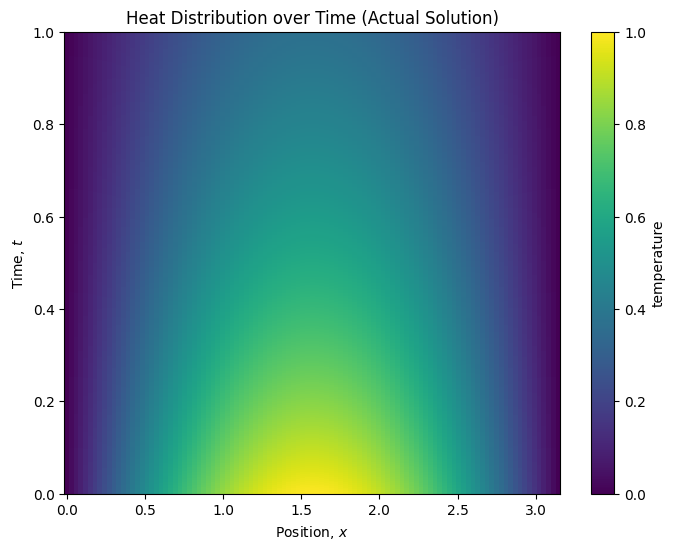

In [3]:
## Example usage for Actual field
U, X, T = actual_solution(r=0.1, dx=0.03, L=np.pi, T=1, alpha=1)
plot_actual_solution(U, X, T)

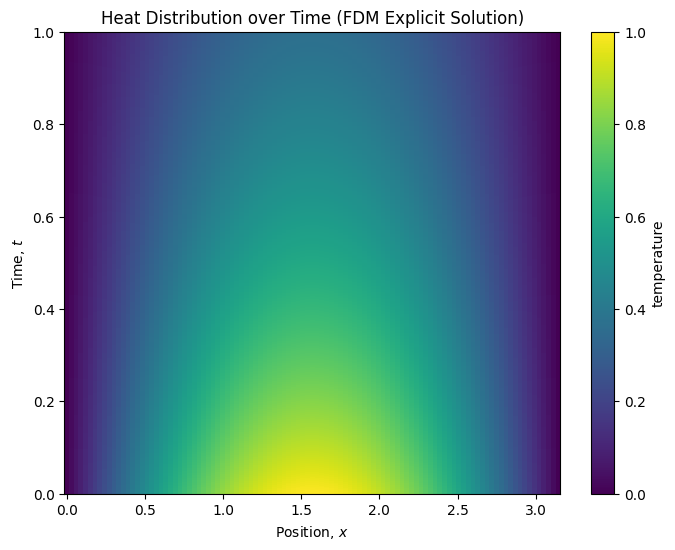

In [4]:
## Example usage for Finite Difference Method
U_fdm_exp, X, T = FDM_explicit_solution(r=0.1, dx= 0.03, L=np.pi, T=1, alpha=1)
plot_FDM_explicit_solution(X, T, U_fdm_exp)

In [22]:
# Parameters for demonstration of error and computation time as a function of r
r_values = np.linspace(0.1, 0.5, 500)  # Example range of r values
dx = 0.02
L = np.pi  # Length of the domain
T = 1  # Total time
alpha = 1  # Thermal diffusivity
x_point = L / 2  # Specific point in space
t_point = T / 2  # Specific point in time
verbose = 1 #(0 or 1 only) (Other than that will raise an error)

# Perform the analysis
errors, computational_time = ErrorAnalysis_Actual_FDMExp_specific_point(r_values, dx, L, T, alpha, x_point, t_point, verbose = 1)

The mesh size at r=0.1 is (25000, 158)
The mesh size at r=0.10080160320641283 is (24802, 158)
The mesh size at r=0.10160320641282565 is (24606, 158)
The mesh size at r=0.10240480961923848 is (24413, 158)
The mesh size at r=0.10320641282565131 is (24224, 158)
The mesh size at r=0.10400801603206414 is (24037, 158)
The mesh size at r=0.10480961923847695 is (23853, 158)
The mesh size at r=0.10561122244488978 is (23672, 158)
The mesh size at r=0.10641282565130261 is (23494, 158)
The mesh size at r=0.10721442885771544 is (23318, 158)
The mesh size at r=0.10801603206412826 is (23145, 158)
The mesh size at r=0.10881763527054109 is (22975, 158)
The mesh size at r=0.10961923847695391 is (22807, 158)
The mesh size at r=0.11042084168336674 is (22641, 158)
The mesh size at r=0.11122244488977956 is (22478, 158)
The mesh size at r=0.11202404809619239 is (22317, 158)
The mesh size at r=0.11282565130260522 is (22159, 158)
The mesh size at r=0.11362725450901805 is (22002, 158)
The mesh size at r=0.11442

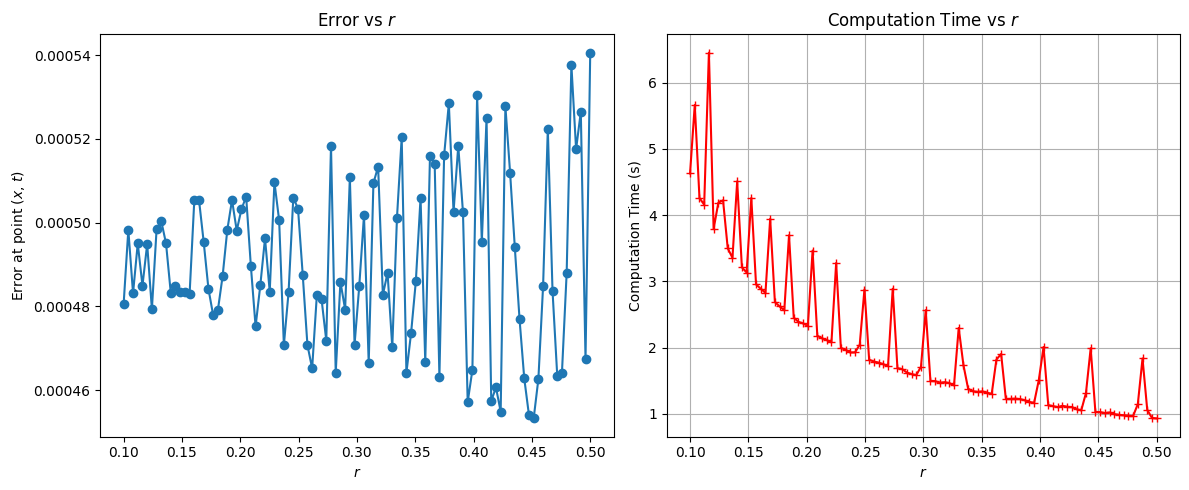

In [20]:
plot_Error_comptime(errors, computational_time, r_values)

# Crank Nicolson Implicit Method

The Crank-Nicolson method approximates the time derivative by the average of the explicit and implicit second-order central differences:

\begin{equation}
\frac{u_{i,j+1} - u_{i,j}}{\Delta t} = \frac{\alpha}{2} \left( \frac{u_{i+1, j+1} - 2u_{i,j+1} + u_{i-1, j+1}}{\Delta x^2} + \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{\Delta x^2} \right)
\end{equation}

Rearranging the equation, we get a system of linear equations that can be written in matrix form as:
\begin{equation}
-\frac{r}{2} u_{i-1,j+1} + (1+r) u_{i,j+1} + - \frac{r}{2} u_{i+1,j+1} =
\frac{r}{2} u_{i-1,j} + (1-r) u_{i,j} + \frac{r}{2} u_{i+1,j}
\end{equation}

where $r = \frac{\Delta t}{(\Delta x)^2}$,

or can be rewritten as $\mathbf{A} \mathbf{U}_{j+1} = \mathbf{B} \mathbf{U}_j + \mathbf{b}$,
where $\mathbf{U}_{j+1}$ and $\mathbf{U}_j$ are vectors representing the temperatures at all spatial points at times $t_{n+1}$ and $t_n$, respectively, $\mathbf{A}$ and $\mathbf{B}$ are tridiagonal matrices, and $\mathbf{b}$ is a boundary condition vector.

The tridiagonal system can be solved at each time step to update the temperature distribution, using methods such as the Thomas algorithm.

This method leads to a system of linear equations:

1. **Matrix Form**: The equation can be represented in a matrix form, allowing us to solve for the vector of unknowns $u^{n+1}$ at the next time step.
2. **Stability and Accuracy**: The Crank-Nicolson method is unconditionally stable and provides second-order accuracy in both time and space.

To solve the equation, one typically rearranges it into a form that can be solved using linear algebra techniques, updating the temperature distribution at each time step.
